In [1]:
import numpy as np 
!pip install pandas
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from ipywidgets import interactive

You should consider upgrading via the 'c:\users\aryas\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


# Orthogonal Matching Pursuit for Outlier Removal on a 1D Data Set

  The first portion of this assignemnts introduces a basic example of using OMP for outlier removal using a simple linear data set. Using the provided functions, you will visualize a dataset with outliers and answer the following questions. The second task is to code the OMP Greedy Algorithm from scratch using only numpy functions and native python functions. This will then be used for the rest of the assignment so be sure that your algorithm works for the dummy dataset.
  
Recall that the pseudocode for OMP is provided for you in the note/lecture slides as well as the mathematical intuition behind the algorithm. Your goal here is to implement this algorithm on a dummy dataset for easy visualization and testing, and then to a real multidimensional data set. 

# Outlier Detection on Dummy Data

In [2]:
# Provided function for generating a dummy set 
def generate_data(n, d, num_outliers): # Code from HW2 Prob 5 OMP Outlier Removal for CS 189
    """
    Generates the data for our problem.
    
    args:
      n: number of samples
      d: dimension of samples
      num_outliers: how many outliers are in the noisy observations;
        we model outliers by adding large Gaussian noise
                      
    returns:
      data: the nxd data matrix X
      w_star: the underlying dx1 matrix W
      observations: nx1 vector of noisy observations with outliers
      
    """
    
    w_star = np.random.uniform(2.0,20.0,(d,1))
    data = np.random.uniform(0.0,10.0,(n,d))
    y_true = np.dot(data,w_star)
    ind = np.random.choice(np.arange(n), num_outliers, False)
    vec = 0.1*np.ones((n,1))
    for a in ind:
        vec[a] = 100.000
    observations = np.random.multivariate_normal(
                        np.ndarray.flatten(y_true), np.diagflat(vec))
    for a in ind:
        observations[a] += 40.000
    return data, w_star, observations


## Visualize dummy data
Using the function above that is taken from CS189 HW2 Q5: 
1. Generate a dataset of 50 points that is one dimensional so that you can visualize the graph. Then you can choose the inital number of outliers to anything between 1-20. 
2. Then using the sklearn library imported above split the data into a 80 percent size training set and a 20 percent size testing set. The students may choose whether to use the built in sklearn function or select the data themselves. 
3. Visualize the scatter plot of the training data
4. Train a Linear Regression model on the training data and plot the learned function.

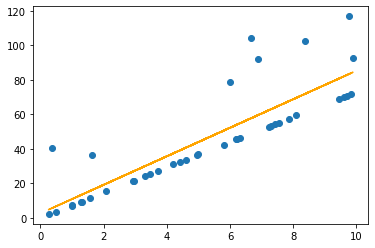

In [3]:
# TODO:
n = 50
d = 1
num_outliers = 10
X, w_star, y = generate_data(n,d,num_outliers) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
plt.scatter(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
plt.plot(X_train, y_pred, color='orange')

## Implementing OMP Algorithm
In your plot, you should see that your learned function doesn't fit your true linear function exactly - it is being skewed by the outliers. In the lecture and note, we learned how OMP can be used for outlier detection. To help find a better regression line, we will utilize OMP on the dummy dataset.

**Implement the OMP algorithm below.** The inputs and outputs have already been defined for you so all you have to code is the algorithm itself. For this part, **DO NOT USE: sklearn's OMP algorithm**. Only use numpy and native python functions to code the entirety of the algorithm. 

In [4]:
def omp_outlier_detection(X, y, k, threshold=0):
    # Input:
    #   X: Features of data to run outlier detection on
    #   y: Labels of data to run outlier detection on
    #   k: Sparsity (How many outliers to detect)
    # Output:
    #   F: Array of indices of outliers

    # TODO: Implement OMP
    r = y - X@np.linalg.inv(X.T@X)@X.T@y
    j = 1
    A = X
    F = []

    while j <= k and np.linalg.norm(r) >= threshold:
        i = np.argmax(abs(r))
        F.append(i)
        e_i = np.zeros(A.shape[0])
        e_i[i] = 1
        e_i = e_i.reshape((e_i.shape[0], 1))
        A = np.hstack([A, e_i])
        x = np.linalg.pinv(A.T@A)@A.T@y
        r = y_train - A@x
        j = j + 1

    return F

Below we have provided the necessary code to interactively plot your data and show the outlier removal process as the sparisty value or k is changed in the process. The graphs that are produced will have their associative questions. 

In [5]:
def generate_num_outliers():
    return widgets.IntSlider(
        value=0,
        min=0,
        max=50,
        step=1,
        description='Sparisty k',
        continuous_update=False)

def visualize_OMP(k):
    F = omp_outlier_detection(X_train, y_train, k)
    outlierArray = X_train[F]
    outlierValues = y_train[F]
    plt.figure(1)
    data1 = plt.scatter(X_train, y_train, color = 'blue')
    data2 = plt.scatter(outlierArray, outlierValues, color = 'red')
    plt.legend((data1, data2), ('True Function', 'Outliers'))
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Graph before OMP")

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    plt.plot(X_train, y_pred, color='orange')

    ## Second Plot without the outliers showing
    plt.figure(2)
    removedX = np.delete(X_train, F).reshape(-1, 1)
    removedY = np.delete(y_train, F)
    data3 = plt.scatter(removedX, removedY, color = 'green')

    omp_model = LinearRegression()
    omp_model.fit(removedX, removedY)
    y_pred = omp_model.predict(removedX)
    plt.plot(removedX, y_pred, color='orange')

    plt.title("Graph after OMP")
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    #plt.legend((data3), ('Resultant Function'))

interactive_plot = interactive(visualize_OMP,
                               k=generate_num_outliers())
interactive_plot


interactive(children=(IntSlider(value=0, continuous_update=False, description='Sparisty k', max=50), Output())…

From the Graphs Above answer the following question: 
1. What occurs when the number of k outliers are removed? What happens if this is too high or too low in comparison to the number of actual outliers present? <br>


---


ANSWER: It is clear that as you increase k the number of selected points that are removed increases by nature of the OMP algorithm however since there is no implemeneted threshold there is a fault where if k is too high you start to delete non-outlier points and some of the actual well fitted data, while if k is too low then there are still outliers present that affect the predicted fit line of the data. 

# Outlier Detection on the Forest Fires Dataset

Now we will attempt to use OMP outlier detection on a real dataset; we will be working with Forest Fire Dataset sourced from UCI's machine learning data sets. The nature of this dataset is as follows:

>There are 517 different data points in this data set that contribute to our X. Each of these datapoints contain 13 features or attributes: The x,y position of the fire in the park, month, day, FFMC, DMC, DC, ISI, temperature, Relative Humidity, Wind, Rain, and our output parameter as the area burned by the fire.

We have imported and visualized the dataset below for you using the pandas dataframe and then also preprocessed the data in the following way.
# Preprocessing
1. Cut out the X, Y position of the fire attributes
2. The labels are skewed towards a burned area of 0, so we took the log transform of our numerical data.
3. Label and One-hot Encoded the Month and Day of the fire to reduce the number of tasks for you.

In [6]:
url = 'https://raw.githubusercontent.com/aparande/EECS189-OMP-Assignment/main/Jupyter%20Assignment/forestfires.csv?token=ACTEYP6ONZJ5E26S3PZYJIK7ZFYMM'
df1 = pd.read_csv(url)
df1

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [7]:
# Split data
from sklearn.compose import ColumnTransformer

X = df1.iloc[:, 2:12]
y = df1.iloc[:, 12]

# Log transform on numerical columns
transformer = ColumnTransformer([("log1p", FunctionTransformer(np.log1p, validate=False), slice(2, 10))], remainder='passthrough')
X = transformer.fit_transform(X)
columns = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "month", "day"]

X = pd.DataFrame(X, columns=columns)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month,day
0,4.4682,3.30322,4.55703,1.80829,2.2192,3.95124,2.04122,0,mar,fri
1,4.51743,3.59457,6.50743,2.04122,2.94444,3.52636,0.641854,0,oct,tue
2,4.51743,3.79997,6.53364,2.04122,2.74727,3.52636,0.832909,0,oct,sat
3,4.52937,3.53515,4.3631,2.30259,2.23001,4.58497,1.60944,0.182322,mar,fri
4,4.50314,3.957,4.63667,2.36085,2.5177,4.60517,1.02962,0,mar,sun
...,...,...,...,...,...,...,...,...,...,...
512,4.41401,4.05526,6.50219,1.06471,3.36038,3.49651,1.30833,0,aug,sun
513,4.41401,4.05526,6.50219,1.06471,3.13114,4.27667,1.91692,0,aug,sun
514,4.41401,4.05526,6.50219,1.06471,3.10009,4.26268,2.04122,0,aug,sun
515,4.55808,4.99043,6.42276,2.5096,3.28091,3.7612,1.60944,0,aug,sat


In [8]:
# One-hot encode
X = pd.get_dummies(X, columns=['month', 'day'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Your Turn: Perform OMP on this dataset
Steps
1. Split the dataset as you did before (Notice here that it is random splitting so the MSE you will recover will be different each time)
2. Fit LR model to the training data and predict on the testing data and report the MSE of the entire dataset without removing any outliers. 
3. Perform OMP on the training set and then do the same thing an perform LR on the newly outlier free dataset. (Here select the number of data points removed to be low because the number of outliers in this set does not exceed 5)

In [9]:
#split train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 189)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))
# scale to be centered data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

## Perform Linear Regression and print the MSE

model = LinearRegression()
model.fit(X_train, y_train)

ypred = model.predict(X_test)
MSE = mean_squared_error(ypred, y_test)
Rsquared = r2_score(ypred, y_test)
print("MSE: ", MSE)

216
54
MSE:  1109.4310129778373


In [10]:
## TODO: Implement a function to delete and return your outlier free training set
def get_new_XY(X_train, y_train, k):
    # Input:
    #   X_train: Training Data to run outlier removal
    #   y_train: Labels of training data to run outlier detection on
    #   k: Sparsity (How many outliers to detect) (Recall <5)
    # Output:
    #   X_train_new: Outlier free feature training data
    #   y_train_new: Outlier free label training data

    indices = omp_outlier_detection(X_train, y_train, k)
    X_train_new = np.delete(X_train, indices, axis=0)
    y_train_new = np.delete(y_train, indices, axis=0)
    return X_train_new, y_train_new

In [11]:
## TODO: Create A prediction function for the outlier free data
def predict_new(X_train_new, y_train_new):
    # Input:
    #   X_train_new: Outlier free feature training data
    #   y_train_new: Outlier free label training data
    # Output:
    #   MSE: Mean Squared Error on the Test Set
    #   Rsquared : Correlation Coefficient on Test Set

    model = LinearRegression()
    model.fit(X_train_new, y_train_new)

    ypred = model.predict(X_test)
    MSE = mean_squared_error(ypred, y_test)
    Rsquared = r2_score(ypred, y_test)
    return MSE, Rsquared

Below is Code Given to you to see the effect of removing multiple outliers and the resultant MSE after a certain number of outliers are removed.

interactive(children=(IntSlider(value=0, continuous_update=False, description='Sparisty k', max=50), Output())…

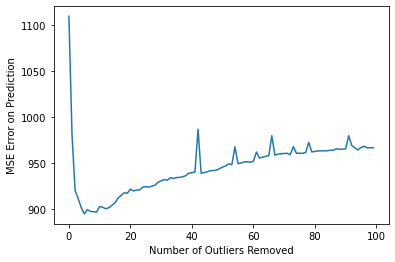

In [12]:
mses = []
r2 = []
max_outlier = 100
for k in range(0, max_outlier):
    D = get_new_XY(X_train, y_train, k)
    errors = predict_new(D[0], D[1])
    mses.append((errors[0]))
    r2.append(errors[1])
ind = np.linspace(0, max_outlier-1, max_outlier)
msesArray = np.asarray(mses)
r2Array = np.asarray(r2)

plt.figure(1)
plt.plot(ind, msesArray)
plt.xlabel("Number of Outliers Removed")
plt.ylabel("MSE Error on Prediction")

def MSEInteractive(k):
    D = get_new_XY(X_train, y_train, k)
    errors = predict_new(D[0], D[1])
    mse = errors[0]
    print("MSE: ", mse)

interactiveMSE = interactive(MSEInteractive,
                               k=generate_num_outliers())
interactiveMSE


**Q: Your graph should have a steep drop and then a steady incline after. What is the approximate optimal number of outliers to remove? Why does the graph form this shape?**

A: Optimal number of outliers to remove is 5-10. Removing the first couple outliers leads to a steep drop in our MSE because we're getting rid of data that negatively impacts our predictor. However, the MSE begins to increase steadily afterwards because we start throwing away useful training points that are not outliers.

## Further Explore the Dataset
Now to Dive Deeper into this Dataset we shall see what is actually going on and what the fires are looking like, while looking at the pandas dataframe find the largest fires by area and what the actual temperature ranges are for those fires.

In [13]:
df1
x = df1.nlargest(5, "area")
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94


Questions:

1. What is the largest fire and the area of the specific fire? <br>
A: The largest fire area is 1,090.84 meters squared.
2. What is the month of the fire as well as the temperature on that day of the fire? <br>
A: The month of the fire is september and the temperature on that day was 25.1 degrees C.


### Removing Portions of Non-Essential Data

So far the dataset that you have regressed and performed OMP on has been modified to have certain features removed now starting from the raw pandas dataframe that you used above remove some of what you may think is the non-essential data. To decide what is essential and not, the process for you is to plot each feature with the target and see which has the 

<AxesSubplot:xlabel='rain', ylabel='area'>

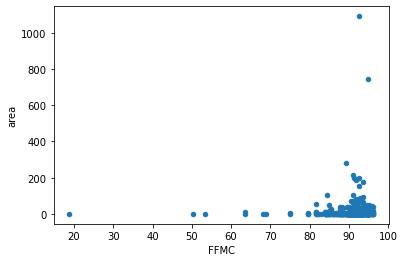

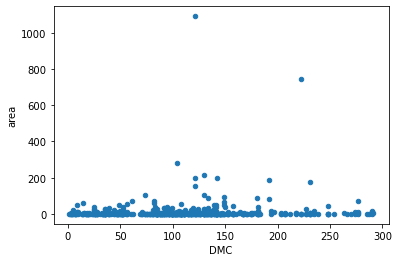

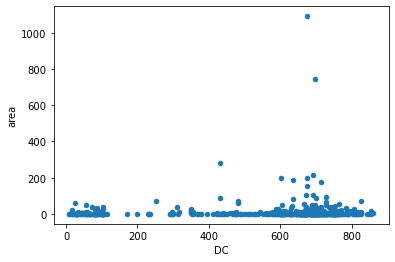

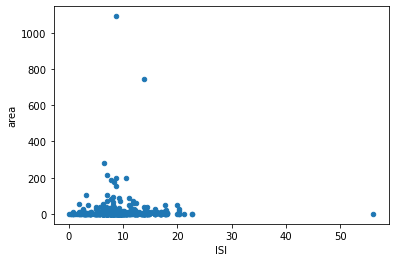

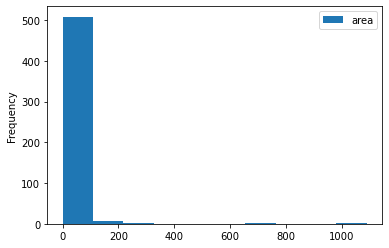

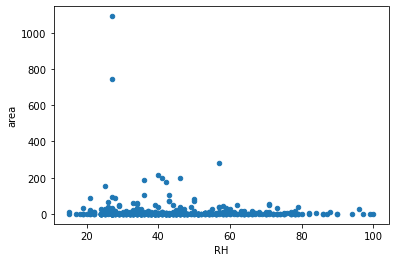

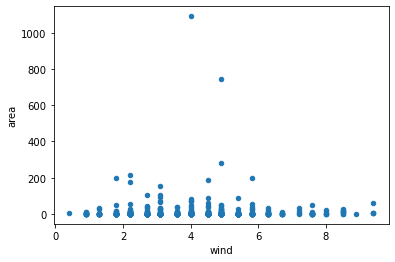

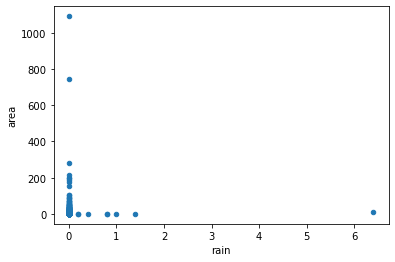

In [24]:
df1.plot(x="FFMC", y = "area", kind = 'scatter')
df1.plot(x= "DMC", y = "area", kind = 'scatter')
df1.plot(x= "DC", y = "area", kind = 'scatter')
df1.plot(x= "ISI", y = "area", kind = 'scatter')
df1.plot(y= "area", kind = 'hist')
df1.plot(x= "RH", y = "area", kind = 'scatter')
df1.plot(x= "wind", y = "area", kind = 'scatter')
df1.plot(x = "rain", y = "area", kind = 'scatter')